## 数据采集
* py连接sql数据库
* sql server数据库取数

In [1]:
##导入数据
import pandas as pd
import numpy as np
data=pd.read_csv('lrfm.csv',header=None)

In [2]:
#看下数据
data.head()

,0,1,2,3
0,528,53,7,3027.6
1,528,120,3,78.5
2,528,2,8,209.1
3,466,39,6,305.3
4,466,282,4,153.9


# 对LRFM模型的数据进行标准化

In [3]:
from sklearn.preprocessing import StandardScaler
data=pd.DataFrame(StandardScaler().fit(data).transform(data)).rename(columns={0:'L',1:'R',2:'F',3:'M'})
data.head()

,L,R,F,M
0,2.108476,-0.594450,0.884616,1.235647
1,2.108476,0.086981,-0.016019,-0.209822
2,2.108476,-1.113152,1.109775,-0.145810
3,1.691349,-0.736839,0.659457,-0.098658
4,1.691349,1.734620,0.209140,-0.172866


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

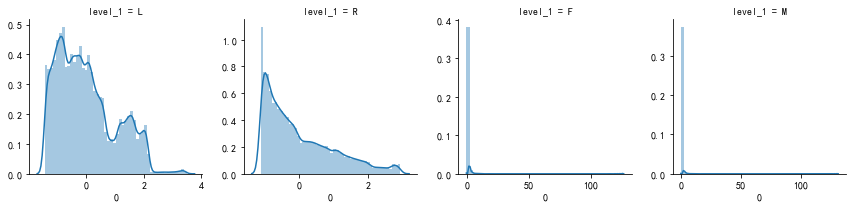

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.FacetGrid(data.stack().reset_index(),col='level_1',sharex=False,sharey=False).map(sns.distplot,0)

# 经过数据标准化后可以发现,F和M分布比较靠前,说明离散点数量多,我们将95分位后的数据替换成95分位数在查看下

In [6]:
def 离散点替换(data,x):
    data.loc[data[x]>=np.percentile(data[x],98),x]=np.percentile(data[x],98)
离散点替换(data,'F')
离散点替换(data,'M')

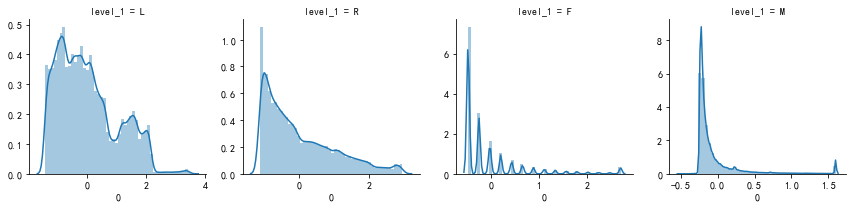

In [7]:
sns.FacetGrid(data.stack().reset_index(),col='level_1',sharex=False,sharey=False).map(sns.distplot,0)

* 虽然也不是很理想,但是表现好很多

# 会员聚类分析

In [8]:
#模型训练
from sklearn.cluster import KMeans
Kmodol=KMeans(5,n_jobs=4)
Kmodol.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
data['类别']=Kmodol.labels_
data=data.rename(columns={0:'L',1:'R',2:'F',3:'M'})

# 可视化

In [10]:
data.head()

,L,R,F,M,类别
0,2.108476,-0.594450,0.884616,1.235647,4
1,2.108476,0.086981,-0.016019,-0.209822,4
2,2.108476,-1.113152,1.109775,-0.145810,4
3,1.691349,-0.736839,0.659457,-0.098658,4
4,1.691349,1.734620,0.209140,-0.172866,0


In [11]:
data_X=data.set_index('类别').stack().reset_index().rename(columns={'level_1':'衡量标准'})

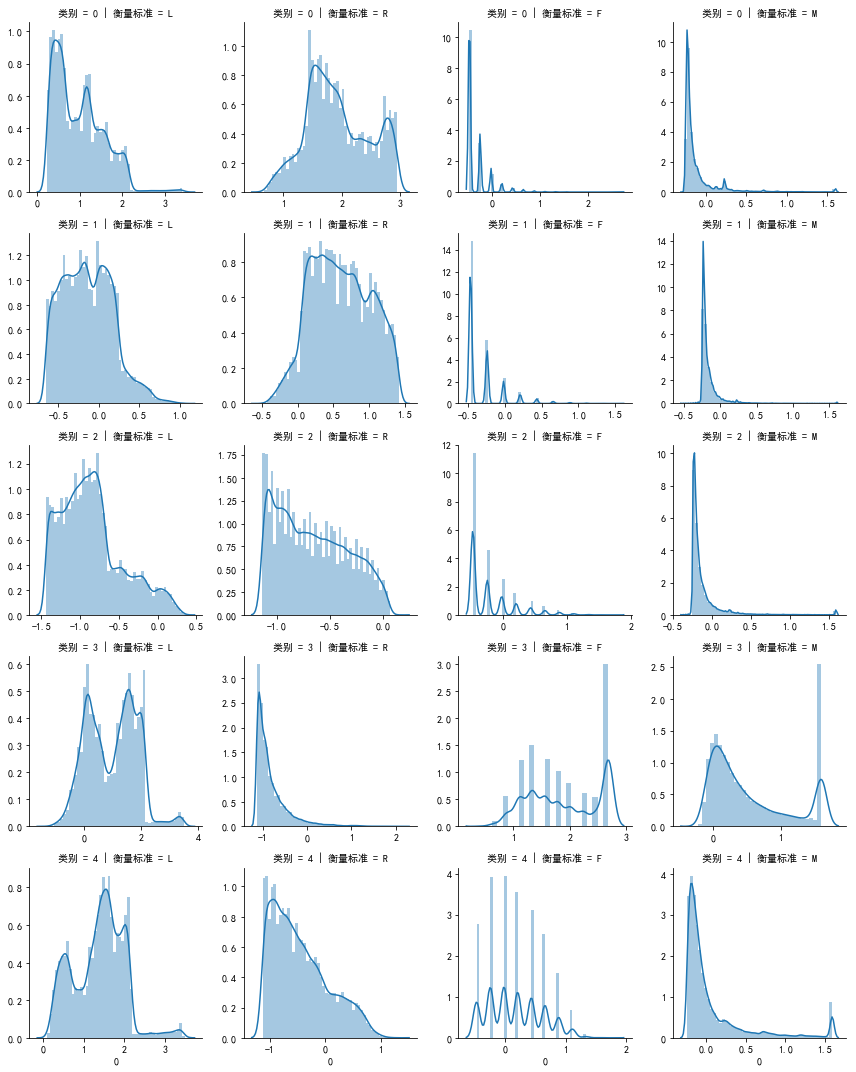

In [12]:
g = sns.FacetGrid(data_X, row="类别",col='衡量标准',sharex=False,sharey=False)
g.map(sns.distplot,0)

In [13]:
pca

NameError: name 'pca' is not defined

In [14]:
cluster_centers=pd.DataFrame(Kmodol.cluster_centers_).rename(columns={0:'L',1:'R',2:'F',3:'M'})
data1=pd.concat([cluster_centers,pd.Series(Kmodol.labels_).value_counts()],axis=1).rename(columns={0:'数量'})
data1

,L,R,F,M,数量
0,0.985457,1.923188,-0.330536,-0.101221,37551
1,-0.136597,0.602146,-0.308492,-0.145663,68393
2,-0.847145,-0.655923,-0.217308,-0.105324,119857
3,0.991686,-0.812169,1.885422,0.524919,21634
4,1.377029,-0.451493,0.168011,0.059313,38104


# 观察5个簇,用来衡量聚类的类型

In [60]:
from pyecharts import Pie,Line
from pyecharts import online
online()
pie=Pie('数量饼图')
pie.add("",['0','1','2','3','4'],list(data1.数量), radius=[45, 65],is_label_show=True)
pie

C:\ProgramData\Anaconda3\lib\site-packages\pyecharts\conf.py:195: UserWarning: Deprecated since 0.3.0! Please use pyecharts.configure() instead.
  "Deprecated since 0.3.0! Please use pyecharts.configure() instead.")


In [59]:
line=Line('1')
for i,z in zip(data1.index,['0','1','2','3','4']):
    line.add(z,['L','R','F','M'],list(data1.drop('数量',axis=1).loc[i]))
line

从各项指标里看